# **Forecasting Late Deliveries in E-commerce**

## **Problem Statement**

This project aims to address frequent late deliveries in supply chains, impacting customer satisfaction
and costs. By developing a predictive model for late_delivery_risk (1 for late, 0 for on-time), using
order data available at placement, logistics teams can identify high-risk deliveries early. This model
provides insights to reduce delays, optimize resources, and improve delivery reliability.

## **Motivation**

Late deliveries can significantly impact a company's reputation and profitability. By developing predictive model for late delivery risk, the company can:

* Enhance its competitive advantage by improving delivery reliability

* Make data-driven decisions to streamline operations

* Increase transparency with customers regarding delivery expectations




## **Data Source**

DataCo Smart Supply Chain for Big Data Analysis - [Mendeley Data](https://data.mendeley.com/datasets/8gx2fvg2k6/3)

## **Data Dictionary**

Type	: Type of transaction made

Days for shipping (real)	: Actual shipping days of the purchased product

Days for shipment (scheduled)	: Days of scheduled delivery of the purchased product

Benefit per order	: Earnings per order placed

Sales per customer	: Total sales per customer made per customer

Delivery Status	: Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time

Late_delivery_risk	: Categorical variable that indicates if sending is late (1), it is not late (0)

Category Id	: Product category code

Category Name	: Description of the product category

Customer City	: City where the customer made the purchase

Customer Country	: Country where the customer made the purchase

Customer Email	: Customer's email

Customer Fname	: Customer name

Customer Id	: Customer ID

Customer Lname	: Customer lastname

Customer Password	: Masked customer key

Customer Segment	: Types of Customers: Consumer , Corporate , Home Office

Customer State	: State to which the store where the purchase is registered belongs

Customer Street	: Street to which the store where the purchase is registered belongs

Customer Zipcode	: Customer Zipcode

Department Id	: Department code of store

Department Name	: Department name of store

Latitude	: Latitude corresponding to location of store

Longitude	: Longitude corresponding to location of store

Market	: Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA

Order City	: Destination city of the order

Order Country	: Destination country of the order

Order Customer Id	: Customer order code

order date (DateOrders)	: Date on which the order is made

Order Id	: Order code

Order Item Cardprod Id	: Product code generated through the RFID reader

Order Item Discount	: Order item discount value

Order Item Discount Rate	: Order item discount percentage

Order Item Id	: Order item code

Order Item Product Price	: Price of products without discount

Order Item Profit Ratio	: Order Item Profit Ratio

Order Item Quantity	: Number of products per order

Sales	: Value in sales

Order Item Total	: Total amount per order

Order Profit Per Order	: Order Profit Per Order

Order Region	: Region of the world where the order is delivered : Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia , Europe , Central America, Eastern Europe, South of USA

Order State	: State of the region where the order is delivered

Order Status	: COMPLETE, PENDING, CLOSED, PENDING_PAYMENT, CANCELED, PROCESSING, SUSPECTED_FRAUD, ON_HOLD, PAYMENT_REVIEW

Product Card Id	: Product code

Product Category Id	: Product category code

Product Description	: Product Description

Product Image	: Link of visit and purchase of the product

Product Name	: Product Name

Product Price	: Product Price

Product Status	: Status of the product stock :If it is 1 not available , 0 the product is available

Shipping date (DateOrders)	: Exact date and time of shipment

Shipping Mode	: The following shipping modes are presented : Standard Class, First Class, Second Class, Same Day

## **Data Load**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

file_name = 'https://drive.google.com/uc?export=download&id=1caYgbe4MAGA9seCMM0bFSEv5WH9akt4I'


df = pd.read_csv(file_name,  encoding='latin-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


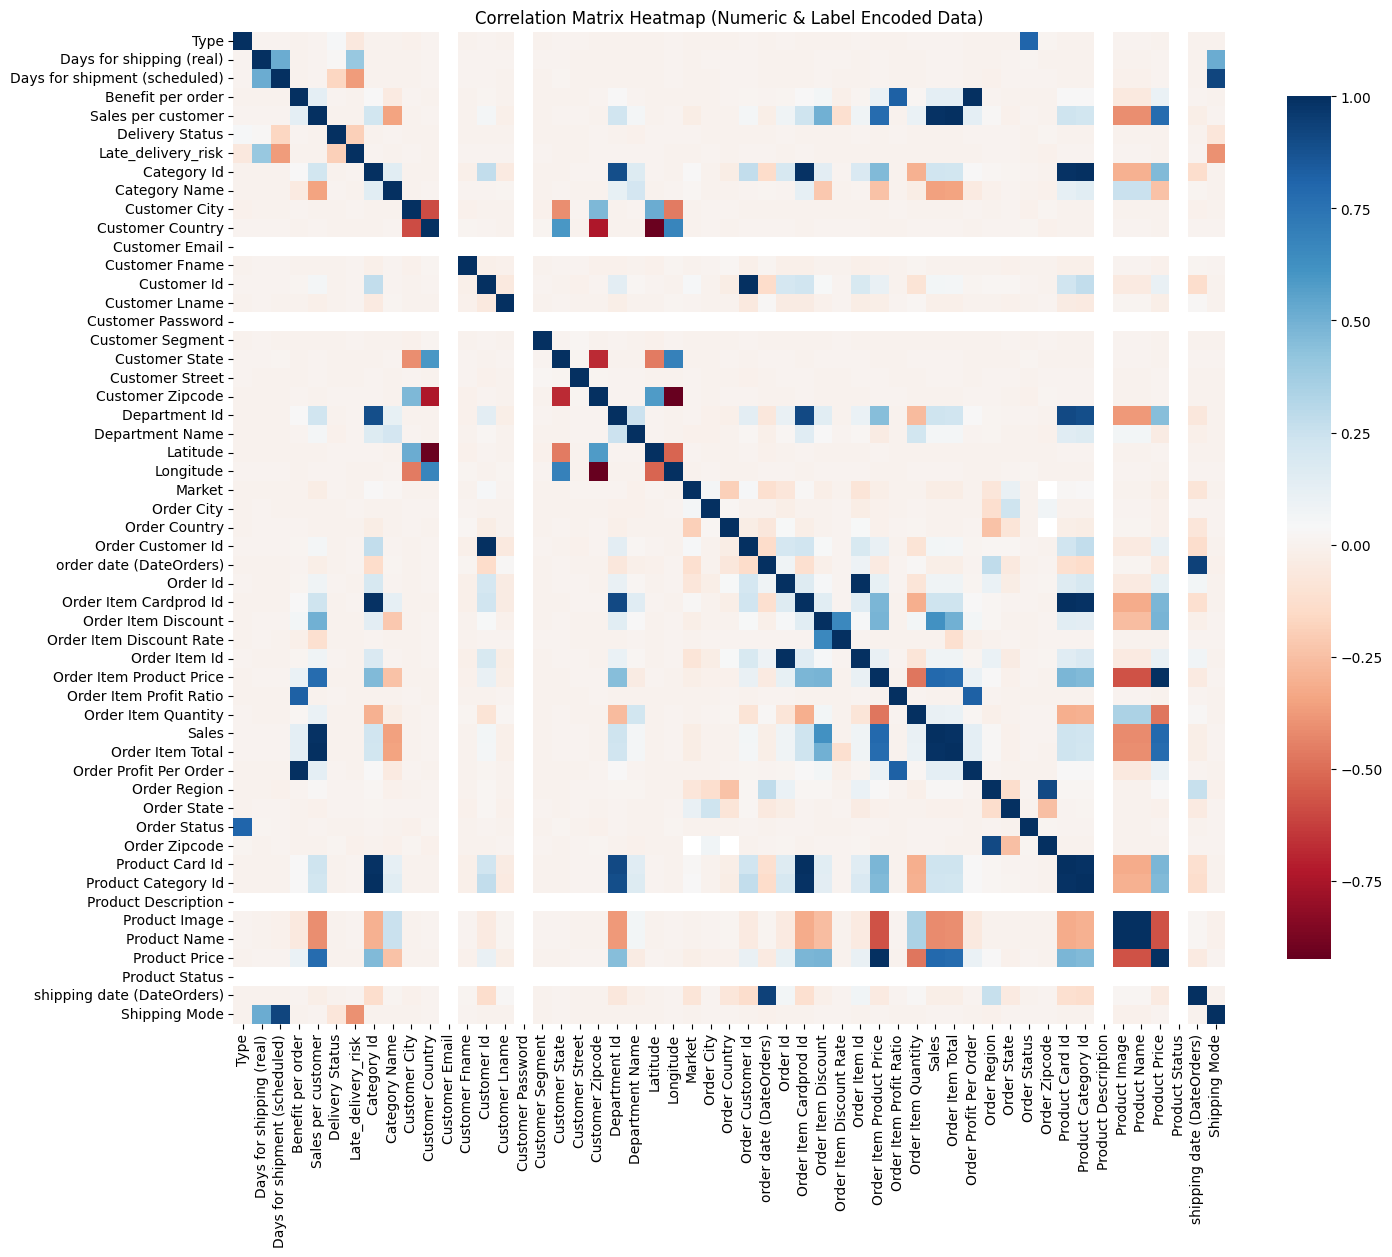

In [ ]:
label_encoded_data = df.copy()
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    try:
        label_encoded_data[col] = label_encoder.fit_transform(df[col].astype(str))
    except Exception as e:
        print(f"Skipping column {col}: {e}")

# Calculate the correlation matrix
correlation_matrix = label_encoded_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot= False, cmap="RdBu", square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Matrix Heatmap (Numeric & Label Encoded Data)")
plt.show()

# **Data Cleaning**

Dropping columns and rearranging columns in desired order.

In [ ]:
columns_to_drop = [
    'Type',
    'Delivery Status',
    'Order Item Id',
    'Product Category Id',
    'Department Name',
    'Department Id',
    'Customer Email',
    'Customer Fname',
    'Customer Id',
    'Customer Lname',
    'Customer Password',
    'Order Customer Id',
    'Customer City',
    'Customer Country',
    'Customer Street',
    'Market',
    'Order City',
    'Order Item Cardprod Id',
    'Product Price',
    'Sales per customer',
    'Order Item Discount Rate',
    'Order Item Profit Ratio',
    'Benefit per order',
    'Sales',
    'Order Region',
    'Product Card Id',
    'Product Description',
    'Product Image',
    'Product Status'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# Desired column order
desired_order = [
    'Order Id',
    'Order Status',
    'Category Id',
    'Category Name',
    'Product Name',
    'Order Item Product Price',
    'Order Item Quantity',
    'Order Item Discount',
    'Order Item Total',
    'Order Profit Per Order',
    'Customer Segment',
    'Customer State',
    'Customer Zipcode',
    'Order State',
    'Order Zipcode',
    'Order Country',
    'Latitude',
    'Longitude',
    'Shipping Mode',
    'order date (DateOrders)',
    'shipping date (DateOrders)',
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Late_delivery_risk'
]

# Reorder columns
df = df[desired_order]

df.head()

,Order Id,Order Status,Category Id,Category Name,Product Name,Order Item Product Price,Order Item Quantity,Order Item Discount,Order Item Total,Order Profit Per Order,...,Order Zipcode,Order Country,Latitude,Longitude,Shipping Mode,order date (DateOrders),shipping date (DateOrders),Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk
0,77202,COMPLETE,73,Sporting Goods,Smart watch,327.75,1,13.110000,314.640015,91.250000,...,NaN,Indonesia,18.251453,-66.037056,Standard Class,1/31/2018 22:56,2/3/2018 22:56,3,4,0
1,75939,PENDING,73,Sporting Goods,Smart watch,327.75,1,16.389999,311.359985,-249.089996,...,NaN,India,18.279451,-66.037064,Standard Class,1/13/2018 12:27,1/18/2018 12:27,5,4,1
2,75938,CLOSED,73,Sporting Goods,Smart watch,327.75,1,18.030001,309.720001,-247.779999,...,NaN,India,37.292233,-121.881279,Standard Class,1/13/2018 12:06,1/17/2018 12:06,4,4,0
3,75937,COMPLETE,73,Sporting Goods,Smart watch,327.75,1,22.940001,304.809998,22.860001,...,NaN,Australia,34.125946,-118.291016,Standard Class,1/13/2018 11:45,1/16/2018 11:45,3,4,0
4,75936,PENDING_PAYMENT,73,Sporting Goods,Smart watch,327.75,1,29.500000,298.250000,134.210007,...,NaN,Australia,18.253769,-66.037048,Standard Class,1/13/2018 11:24,1/15/2018 11:24,2,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Order Id                       180519 non-null  int64  
 1   Order Status                   180519 non-null  object 
 2   Category Id                    180519 non-null  int64  
 3   Category Name                  180519 non-null  object 
 4   Product Name                   180519 non-null  object 
 5   Order Item Product Price       180519 non-null  float64
 6   Order Item Quantity            180519 non-null  int64  
 7   Order Item Discount            180519 non-null  float64
 8   Order Item Total               180519 non-null  float64
 9   Order Profit Per Order         180519 non-null  float64
 10  Customer Segment               180519 non-null  object 
 11  Customer State                 180519 non-null  object 
 12  Customer Zipcode              

1. Keeping only 'COMPLETE' orders from 'Order Status'
2. Dropping rows where zip codes are null in 'Customer Zipcode' and 'Order Zipcode'
3. Renaming columns
4. Converting Zipcodes to integers (from floats)


In [ ]:
# Keep rows where Order Status is 'Complete'
df = df[df['Order Status'] == 'COMPLETE']

# Drop rows where zip code is null
df = df.dropna(subset=['Customer Zipcode', 'Order Zipcode'])

# Rename columns
df = df.rename(columns={
    'Order Item Product Price': 'Product Price',
    'Order Item Quantity': 'Quantity',
    'Order Item Discount': 'Discount Value',
    'Order Item Total': 'Order Value',
    'Order Profit Per Order': 'Profit',
    'Latitude': 'Store Latitude',
    'Longitude': 'Store Longitude',
    'Days for shipment (scheduled)': 'Days for shipping (scheduled)',
    'Late_delivery_risk': 'Late Delivery Risk'
})

# Convert 'Customer Zipcode' and 'Order Zipcode' to integers
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0).astype(int)
df['Order Zipcode'] = df['Order Zipcode'].fillna(0).astype(int)

# Round values to 2 decimal places
columns_to_round = ['Product Price', 'Discount Value', 'Order Value', 'Profit']
df[columns_to_round] = df[columns_to_round].round(2)

# Format "Customer Zipcode" and "Order Zipcode" to ensure 5 digits
df['Customer Zipcode'] = df['Customer Zipcode'].apply(lambda x: f"{int(x):05d}")
df['Order Zipcode'] = df['Order Zipcode'].apply(lambda x: f"{int(x):05d}")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8437 entries, 2650 to 177115
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order Id                       8437 non-null   int64  
 1   Order Status                   8437 non-null   object 
 2   Category Id                    8437 non-null   int64  
 3   Category Name                  8437 non-null   object 
 4   Product Name                   8437 non-null   object 
 5   Product Price                  8437 non-null   float64
 6   Quantity                       8437 non-null   int64  
 7   Discount Value                 8437 non-null   float64
 8   Order Value                    8437 non-null   float64
 9   Profit                         8437 non-null   float64
 10  Customer Segment               8437 non-null   object 
 11  Customer State                 8437 non-null   object 
 12  Customer Zipcode               8437 non-null   o

We are left with 8437 entries now.

In [ ]:
df.head()

,Order Id,Order Status,Category Id,Category Name,Product Name,Product Price,Quantity,Discount Value,Order Value,Profit,...,Order Zipcode,Order Country,Store Latitude,Store Longitude,Shipping Mode,order date (DateOrders),shipping date (DateOrders),Days for shipping (real),Days for shipping (scheduled),Late Delivery Risk
2650,40991,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,1,0.88,21.12,-3.44,...,94110,Estados Unidos,38.687073,-77.379875,Standard Class,8/21/2016 8:37,8/23/2016 8:37,2,4,0
2654,40153,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,3,3.30,62.70,4.70,...,95823,Estados Unidos,18.273325,-66.370514,Standard Class,8/9/2016 3:02,8/13/2016 3:02,4,4,0
2659,39718,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,3,4.62,61.38,-42.97,...,08701,Estados Unidos,33.928776,-117.447845,Same Day,8/2/2016 18:38,8/3/2016 6:38,1,0,1
2667,38466,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,5,22.00,88.00,29.92,...,94122,Estados Unidos,34.000626,-117.907730,Second Class,7/15/2016 12:00,7/17/2016 12:00,2,2,0
2668,38383,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,1,2.20,19.80,6.93,...,19013,Estados Unidos,32.760651,-117.016670,Standard Class,7/14/2016 6:55,7/18/2016 6:55,4,4,0


Replacing Mexican names of Country and states.

In [ ]:
# Replace "Estados Unidos" with "United States" in "Order Country"
df['Order Country'] = df['Order Country'].replace('Estados Unidos', 'United States')


# Create a dictionary for correcting state names
state_corrections = {
    "California": "California",
    "Pensilvania": "Pennsylvania",
    "Maryland": "Maryland",
    "Arkansas": "Arkansas",
    "Delaware": "Delaware",
    "Nueva York": "New York",
    "Florida": "Florida",
    "Colorado": "Colorado",
    "Virginia": "Virginia",
    "Carolina del Norte": "North Carolina",
    "Texas": "Texas",
    "Illinois": "Illinois",
    "Minnesota": "Minnesota",
    "OregÛn": "Oregon",
    "Indiana": "Indiana",
    "Washington": "Washington",
    "Misuri": "Missouri",
    "Carolina del Sur": "South Carolina",
    "Kansas": "Kansas",
    "Wisconsin": "Wisconsin",
    "Ohio": "Ohio",
    "Tennessee": "Tennessee",
    "Arizona": "Arizona",
    "Misisipi": "Mississippi",
    "Nevada": "Nevada",
    "Nueva Jersey": "New Jersey",
    "Massachusetts": "Massachusetts",
    "Michigan": "Michigan",
    "Nuevo MÈxico": "New Mexico",
    "Utah": "Utah",
    "Luisiana": "Louisiana",
    "Georgia": "Georgia",
    "Oklahoma": "Oklahoma",
    "Kentucky": "Kentucky",
    "Idaho": "Idaho",
    "Alabama": "Alabama",
    "Distrito de Columbia": "District of Columbia",
    "Montana": "Montana",
    "Iowa": "Iowa",
    "Dakota del Norte": "North Dakota",
    "Virginia Occidental": "West Virginia",
    "Dakota del Sur": "South Dakota",
    "Nebraska": "Nebraska"
}

# Replace incorrect state names with corrected names in "Order State"
df['Order State'] = df['Order State'].replace(state_corrections)

# Display the updated DataFrame
df.head()

,Order Id,Order Status,Category Id,Category Name,Product Name,Product Price,Quantity,Discount Value,Order Value,Profit,...,Order Zipcode,Order Country,Store Latitude,Store Longitude,Shipping Mode,order date (DateOrders),shipping date (DateOrders),Days for shipping (real),Days for shipping (scheduled),Late Delivery Risk
2650,40991,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,1,0.88,21.12,-3.44,...,94110,United States,38.687073,-77.379875,Standard Class,8/21/2016 8:37,8/23/2016 8:37,2,4,0
2654,40153,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,3,3.30,62.70,4.70,...,95823,United States,18.273325,-66.370514,Standard Class,8/9/2016 3:02,8/13/2016 3:02,4,4,0
2659,39718,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,3,4.62,61.38,-42.97,...,08701,United States,33.928776,-117.447845,Same Day,8/2/2016 18:38,8/3/2016 6:38,1,0,1
2667,38466,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,5,22.00,88.00,29.92,...,94122,United States,34.000626,-117.907730,Second Class,7/15/2016 12:00,7/17/2016 12:00,2,2,0
2668,38383,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,1,2.20,19.80,6.93,...,19013,United States,32.760651,-117.016670,Standard Class,7/14/2016 6:55,7/18/2016 6:55,4,4,0


Formatting 'shipping date (DateOrders)' and 'shipping date (DateOrders)' columns.



In [ ]:
# Convert 'order date (DateOrders)' and 'shipping date (DateOrders)' to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# Extract date and time, format them, and store them as new columns
order_date = df['order date (DateOrders)'].dt.date  # Extract the date
order_time = df['order date (DateOrders)'].dt.strftime('%H:%M')  # Format the time as HH:MM
shipping_date = df['shipping date (DateOrders)'].dt.date  # Extract the date
shipping_time = df['shipping date (DateOrders)'].dt.strftime('%H:%M')  # Format the time as HH:MM

# Drop the original combined columns
df = df.drop(columns=['order date (DateOrders)', 'shipping date (DateOrders)'])

# Identify the index of 'Shipping Mode' to insert new columns after it
shipping_mode_index = df.columns.get_loc('Shipping Mode') + 1  # Get the index after 'Shipping Mode'

# Reorder columns and insert the new ones at the desired position
new_columns = ['Order Date', 'Order Time', 'Shipping Date', 'Shipping Time']
df = pd.concat([
    df.iloc[:, :shipping_mode_index],  # Columns before 'Shipping Mode'
    pd.DataFrame({
        'Order Date': order_date,
        'Order Time': order_time,
        'Shipping Date': shipping_date,
        'Shipping Time': shipping_time
    }, index=df.index),  # Newly created columns
    df.iloc[:, shipping_mode_index:]  # Columns after 'Shipping Mode'
], axis=1)

df.head()

,Order Id,Order Status,Category Id,Category Name,Product Name,Product Price,Quantity,Discount Value,Order Value,Profit,...,Store Latitude,Store Longitude,Shipping Mode,Order Date,Order Time,Shipping Date,Shipping Time,Days for shipping (real),Days for shipping (scheduled),Late Delivery Risk
2650,40991,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,1,0.88,21.12,-3.44,...,38.687073,-77.379875,Standard Class,2016-08-21,08:37,2016-08-23,08:37,2,4,0
2654,40153,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,3,3.30,62.70,4.70,...,18.273325,-66.370514,Standard Class,2016-08-09,03:02,2016-08-13,03:02,4,4,0
2659,39718,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,3,4.62,61.38,-42.97,...,33.928776,-117.447845,Same Day,2016-08-02,18:38,2016-08-03,06:38,1,0,1
2667,38466,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,5,22.00,88.00,29.92,...,34.000626,-117.907730,Second Class,2016-07-15,12:00,2016-07-17,12:00,2,2,0
2668,38383,COMPLETE,7,Hockey,Nike Dri-FIT Crew Sock 6 Pack,22.0,1,2.20,19.80,6.93,...,32.760651,-117.016670,Standard Class,2016-07-14,06:55,2016-07-18,06:55,4,4,0


# **Correlation**

<Axes: >

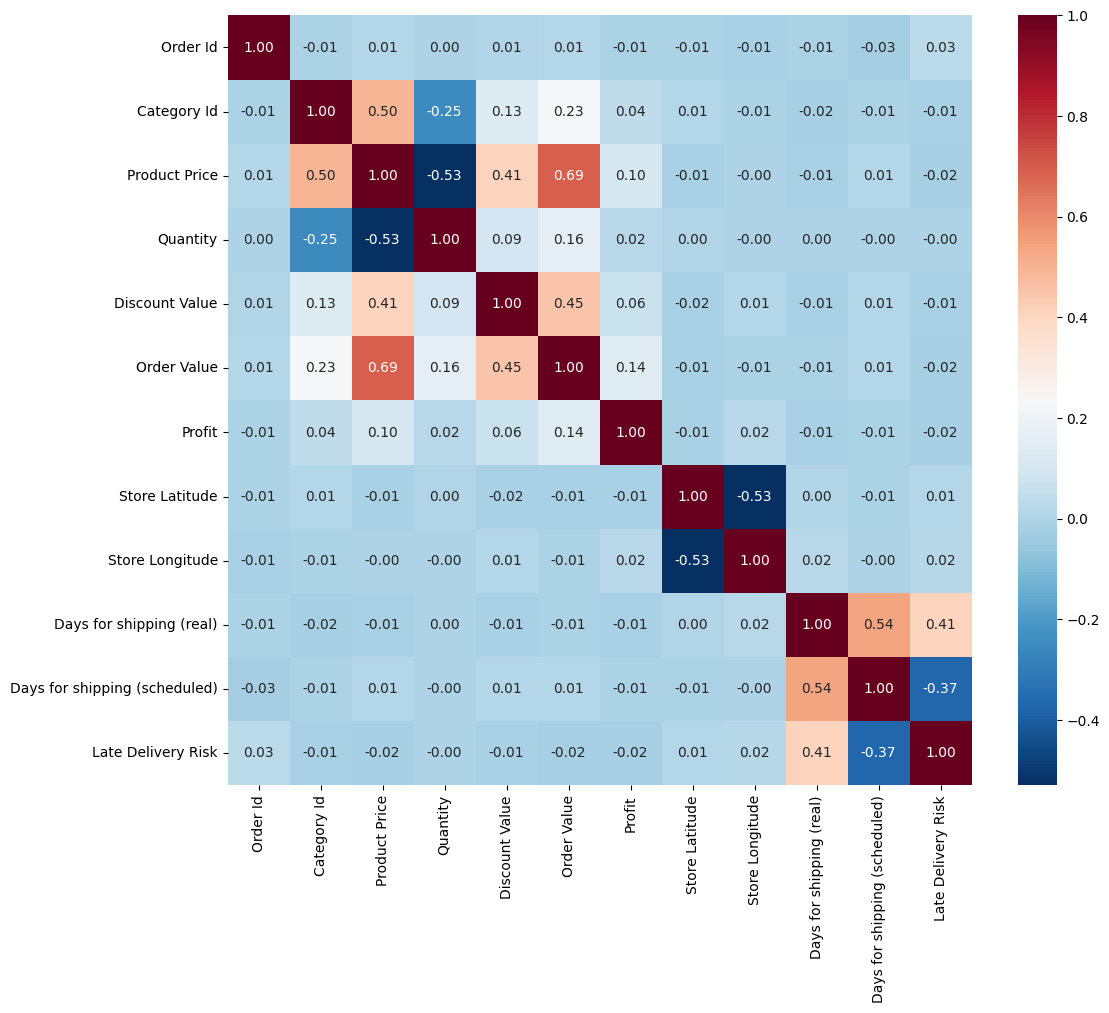

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    annot_kws={"size": 10}  # Adjust the font size as needed
)

# What is the distribution of the target variable (late_delivery_risk)?

<ipython-input-11-520d0e55b173>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=late_percent.index.astype(str), y=late_percent.values, palette='Set2')


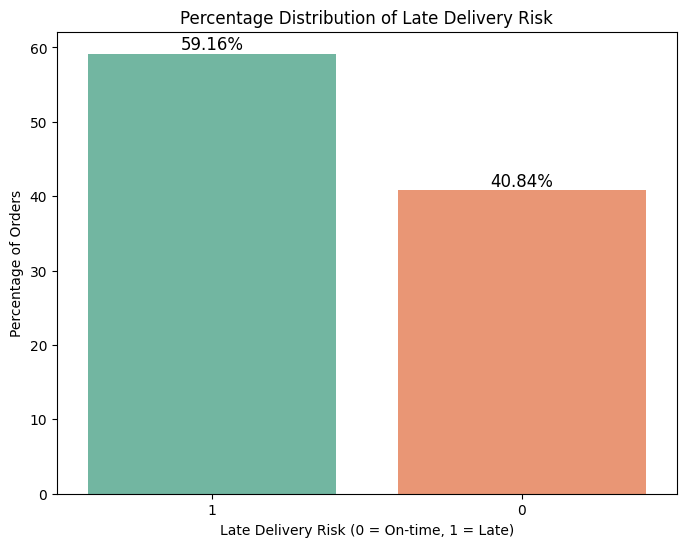

In [ ]:
plt.figure(figsize=(8, 6))
late_counts = df['Late Delivery Risk'].value_counts()
late_percent = late_counts / late_counts.sum() * 100
sns.barplot(x=late_percent.index.astype(str), y=late_percent.values, palette='Set2')
plt.title('Percentage Distribution of Late Delivery Risk')
plt.xlabel('Late Delivery Risk (0 = On-time, 1 = Late)')
plt.ylabel('Percentage of Orders')

# Annotate percentages on the bars
for i, p in enumerate(plt.gca().patches):
    plt.annotate(f'{late_percent.values[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12, color='black')

plt.show()

# How do numerical features (e.g., Product Price, Quantity, Discount Value, Order Value, Profit, Days for shipping) correlate with late_delivery_risk?

<ipython-input-12-3666d6e717ac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Late Delivery Risk', y=feature, data=df, palette='Set3')


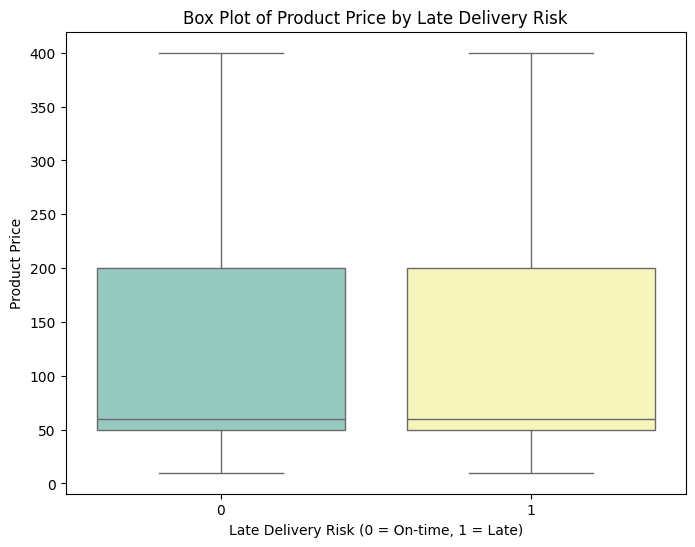

<ipython-input-12-3666d6e717ac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Late Delivery Risk', y=feature, data=df, palette='Set3')


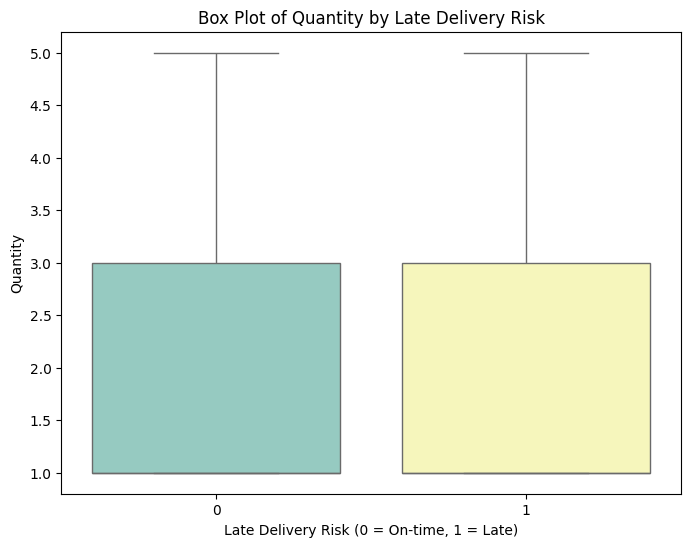

<ipython-input-12-3666d6e717ac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Late Delivery Risk', y=feature, data=df, palette='Set3')


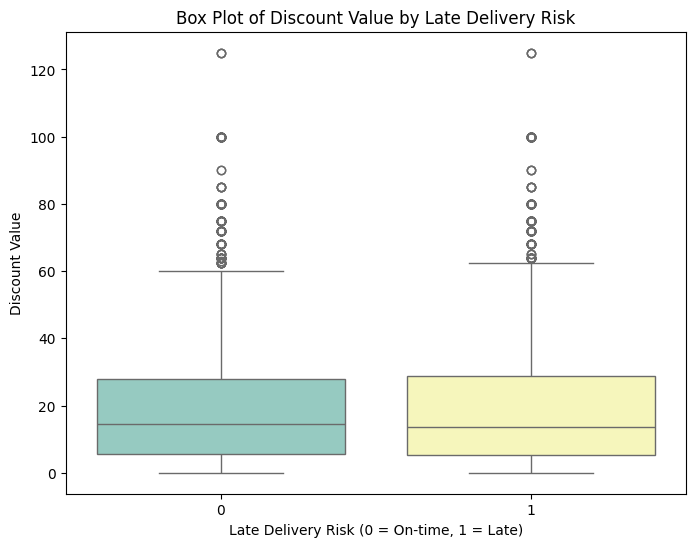

<ipython-input-12-3666d6e717ac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Late Delivery Risk', y=feature, data=df, palette='Set3')


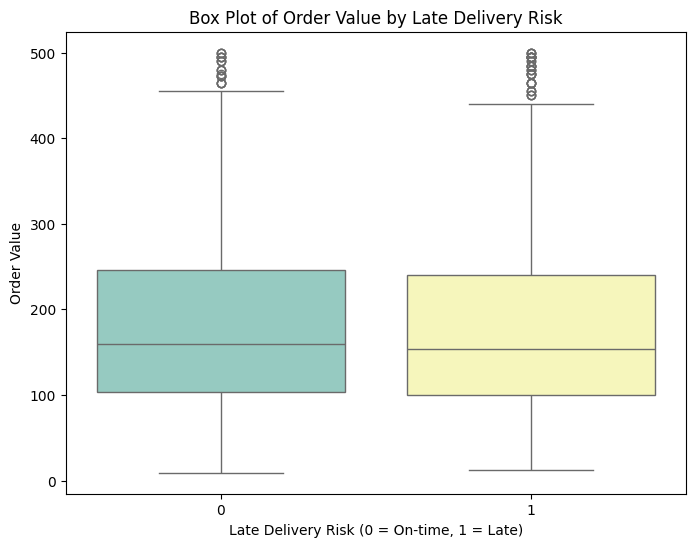

<ipython-input-12-3666d6e717ac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Late Delivery Risk', y=feature, data=df, palette='Set3')


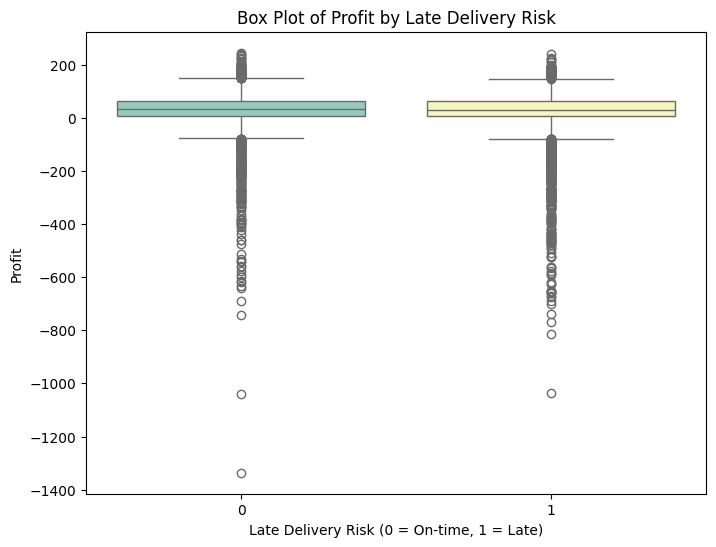

<ipython-input-12-3666d6e717ac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Late Delivery Risk', y=feature, data=df, palette='Set3')


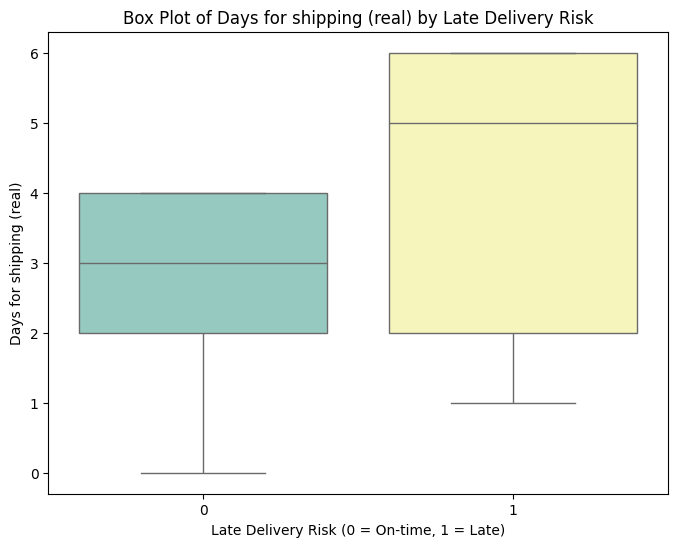

In [ ]:
# List of numerical features to analyze
numerical_features = ['Product Price', 'Quantity', 'Discount Value', 'Order Value', 'Profit', 'Days for shipping (real)']

# Verify that all numerical features exist in the dataset
missing_features = [feature for feature in numerical_features if feature not in df.columns]
if missing_features:
    raise ValueError(f"The following numerical features are missing from the dataset: {missing_features}")

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Late Delivery Risk', y=feature, data=df, palette='Set3')
    plt.title(f'Box Plot of {feature} by Late Delivery Risk')
    plt.xlabel('Late Delivery Risk (0 = On-time, 1 = Late)')
    plt.ylabel(feature)
    plt.show()


<ipython-input-17-b0d3ba5ecea6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


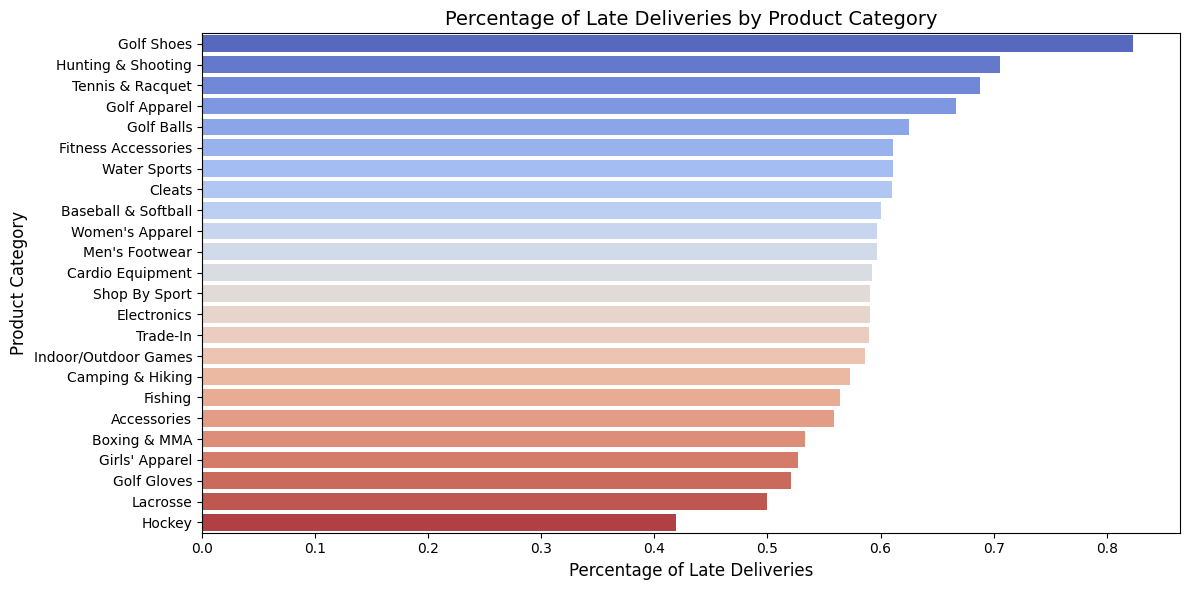

In [ ]:
# Calculate late delivery percentage by product category
category_risk = df.groupby('Category Name').agg(
    late_deliveries=('Late Delivery Risk', 'sum'),
    total_orders=('Late Delivery Risk', 'count')
)
category_risk['late_percentage'] = category_risk['late_deliveries'] / category_risk['total_orders']

# Sort by percentage for visualization
category_risk = category_risk.sort_values(by='late_percentage', ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(
    x=category_risk['late_percentage'],
    y=category_risk.index,
    palette="coolwarm"
)
plt.title("Percentage of Late Deliveries by Product Category", fontsize=14)
plt.xlabel("Percentage of Late Deliveries", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Order Id', 'Order Status', 'Category Id', 'Category Name',
       'Product Name', 'Product Price', 'Quantity', 'Discount Value',
       'Order Value', 'Profit', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Order State', 'Order Zipcode', 'Order Country',
       'Store Latitude', 'Store Longitude', 'Shipping Mode', 'Order Date',
       'Order Time', 'Shipping Date', 'Shipping Time',
       'Days for shipping (real)', 'Days for shipping (scheduled)',
       'Late Delivery Risk'],
      dtype='object')